# **CARS PRICE**

Hướng dẫn sử dụng:
1. Tải file dữ liệu lên Google Drive.
2. Đặt tên file dữ liệu là "CarsData.csv".
3. Nhấn button để kết nối đến dữ liệu.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
drive.mount('/content/drive')
path = '/content/drive/MyDrive/CarsData.csv'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đọc dữ liệu từ file .csv:
df = pd.read_csv(path)
print(df)


               model  year  price transmission  mileage fuelType  tax   mpg  \
0                I10  2017   7495       Manual    11630   Petrol  145  60.1   
1               Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2           2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3       Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4             Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
...              ...   ...    ...          ...      ...      ...  ...   ...   
97707         Fiesta  2017  10447    Automatic     8337   Petrol  145  54.3   
97708       3 Series  2014  14995       Manual    25372   Diesel   30  61.4   
97709         Fiesta  2017   8950       Manual    19910   Petrol  125  54.3   
97710          Astra  2017  10700    Automatic    24468   Petrol  125  50.4   
97711    Grandland X  2019  15798       Manual    10586   Diesel  150  48.7   

       engineSize Manufacturer  
0             1.0 

In [ ]:
#Khám phá dữ liệu ban đầu
#df.info() #Xem qua các hàng đầu tiên của dữ liệu + Liệt kê cột hàng, thuộc tính
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB
None


In [ ]:
#
df['model'] = df['model'].str.strip()
# Hiển thị DataFrame sau khi xử lý
print(df)

print(df.info())
# Chuyển đổi cột 'price' sang kiểu dữ liệu float
df['price'] = df['price'].astype(float)

# Hiển thị thông tin sau khi chuyển đổi
print("\nThông tin dữ liệu sau khi chuyển đổi cột 'price' sang float:")
print(df.info())


              model  year  price transmission  mileage fuelType  tax   mpg  \
0               I10  2017   7495       Manual    11630   Petrol  145  60.1   
1              Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2          2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3      Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4            Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   
...             ...   ...    ...          ...      ...      ...  ...   ...   
97707        Fiesta  2017  10447    Automatic     8337   Petrol  145  54.3   
97708      3 Series  2014  14995       Manual    25372   Diesel   30  61.4   
97709        Fiesta  2017   8950       Manual    19910   Petrol  125  54.3   
97710         Astra  2017  10700    Automatic    24468   Petrol  125  50.4   
97711   Grandland X  2019  15798       Manual    10586   Diesel  150  48.7   

       engineSize Manufacturer  
0             1.0       hyundi

In [ ]:
# Chọn các cột số học (loại bỏ cột 'year')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('year')  # Loại bỏ cột 'year' nếu có

# Tạo DataFrame mới chỉ chứa các cột số học
df1 = df[numeric_columns]


# Tính toán các thống kê mô tả cho các cột số học (mean, median, std, min, max, quartiles).
stats = df1.describe()

# Tính phương sai (variance) và độ lệch chuẩn (standard deviation) bằng NumPy
variance = df1.var()
std_dev = df1.std()

# Thêm các thông số phương sai và độ lệch chuẩn vào DataFrame stats
stats.loc['variance'] = variance
stats.loc['std_dev'] = std_dev

print(stats)

                 price       mileage           tax           mpg    engineSize
count     9.771200e+04  9.771200e+04  97712.000000  97712.000000  97712.000000
mean      1.677349e+04  2.321948e+04    120.142408     55.205623      1.664913
std       9.868552e+03  2.106088e+04     63.357250     16.181659      0.558574
min       4.500000e+02  1.000000e+00      0.000000      0.300000      0.000000
25%       9.999000e+03  7.673000e+03    125.000000     47.100000      1.200000
50%       1.447000e+04  1.768250e+04    145.000000     54.300000      1.600000
75%       2.075000e+04  3.250000e+04    145.000000     62.800000      2.000000
max       1.599990e+05  3.230000e+05    580.000000    470.800000      6.600000
variance  9.738832e+07  4.435608e+08   4014.141124    261.846094      0.312005
std_dev   9.868552e+03  2.106088e+04     63.357250     16.181659      0.558574


In [ ]:
# In ra kết quả
print("\nThống kê mô tả và phương sai, độ lệch chuẩn:")
print(stats)


Thống kê mô tả và phương sai, độ lệch chuẩn:
                 price       mileage           tax           mpg    engineSize
count     9.771200e+04  9.771200e+04  97712.000000  97712.000000  97712.000000
mean      1.677349e+04  2.321948e+04    120.142408     55.205623      1.664913
std       9.868552e+03  2.106088e+04     63.357250     16.181659      0.558574
min       4.500000e+02  1.000000e+00      0.000000      0.300000      0.000000
25%       9.999000e+03  7.673000e+03    125.000000     47.100000      1.200000
50%       1.447000e+04  1.768250e+04    145.000000     54.300000      1.600000
75%       2.075000e+04  3.250000e+04    145.000000     62.800000      2.000000
max       1.599990e+05  3.230000e+05    580.000000    470.800000      6.600000
variance  9.738832e+07  4.435608e+08   4014.141124    261.846094      0.312005
std_dev   9.868552e+03  2.106088e+04     63.357250     16.181659      0.558574


<ipython-input-38-d19e77080339>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating, bins=20, color='#6600CC'),


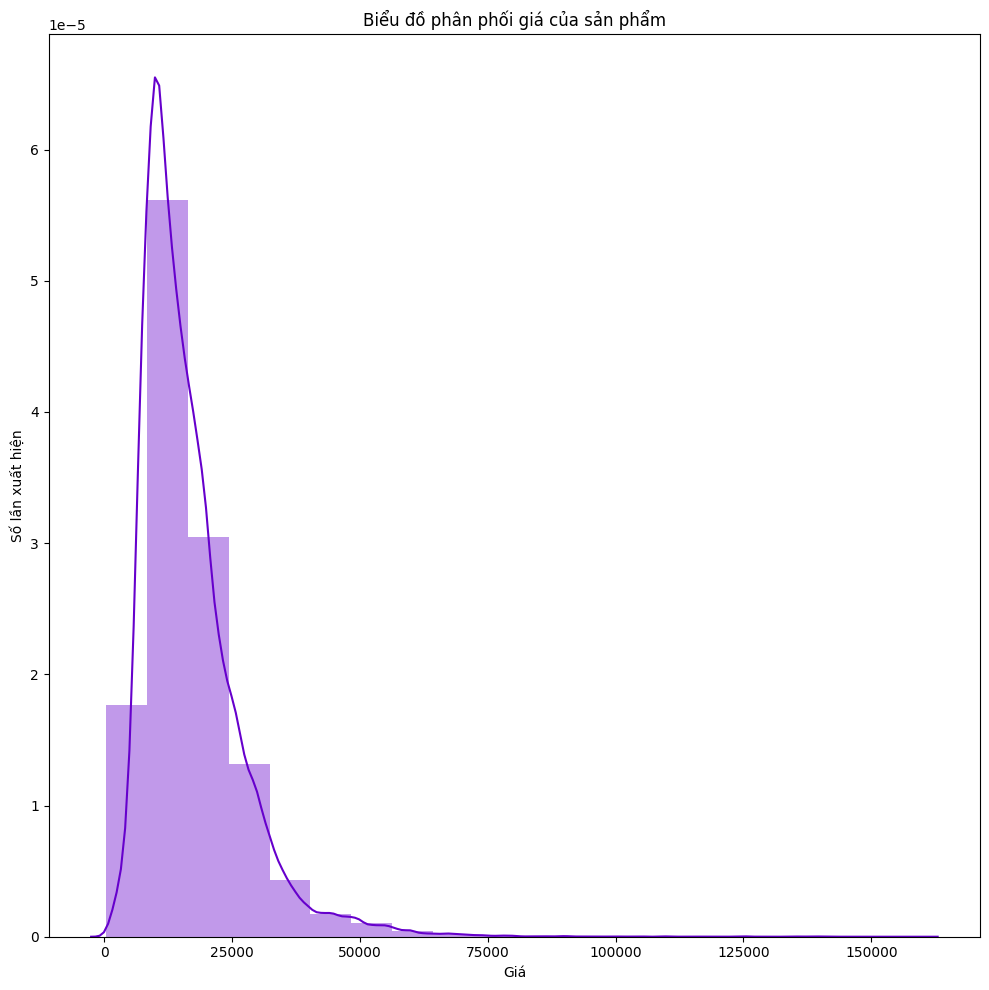

In [ ]:
plt.figure(figsize=(10,10))
rating= df.price.astype(float)
sns.distplot(rating, bins=20, color='#6600CC'),
plt.xlabel('Giá')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ phân phối giá của sản phẩm')
plt.grid(False)
plt.tight_layout()
plt.show()

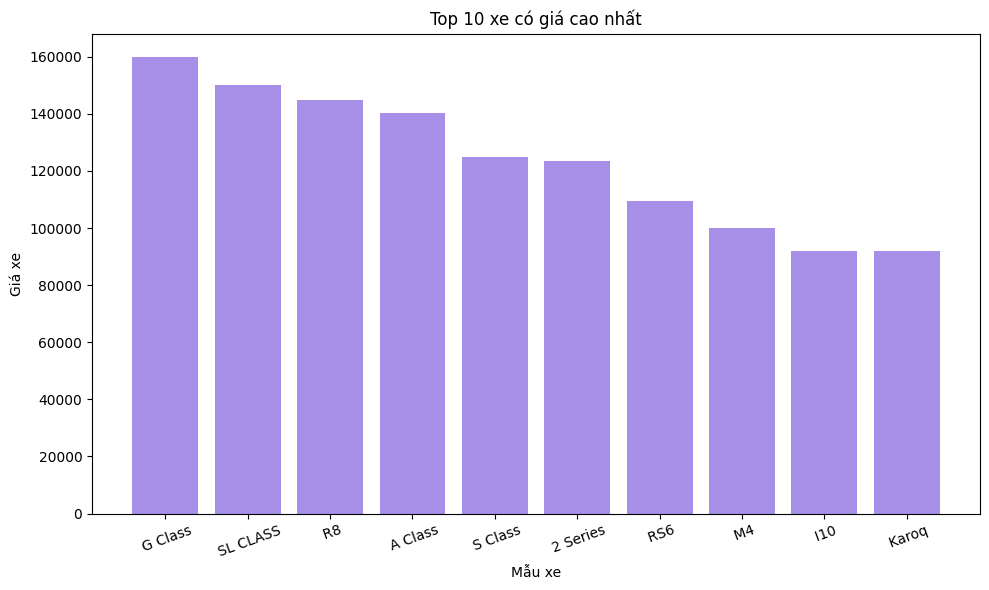

In [ ]:
top_10_expensive_cars = df.sort_values(by='price', ascending=False).drop_duplicates(subset='model').head(10)

# Biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(top_10_expensive_cars['model'], top_10_expensive_cars['price'], color='#A78FE7')
plt.xlabel('Mẫu xe')
plt.ylabel('Giá xe')
plt.title('Top 10 xe có giá cao nhất')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

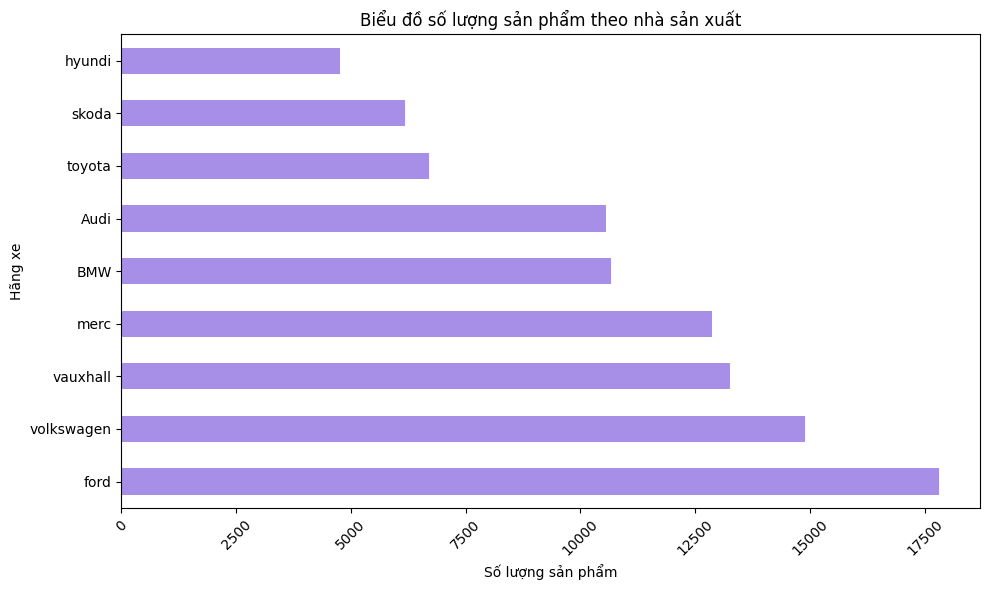

In [ ]:
# Đếm số lượng sản phẩm theo từng hãng xe
manufacturer_counts = df['Manufacturer'].value_counts()

# Biểu đồ cột
plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='barh', color='#A78FE7')
plt.ylabel('Hãng xe')
plt.xlabel('Số lượng sản phẩm')
plt.title('Biểu đồ số lượng sản phẩm theo nhà sản xuất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

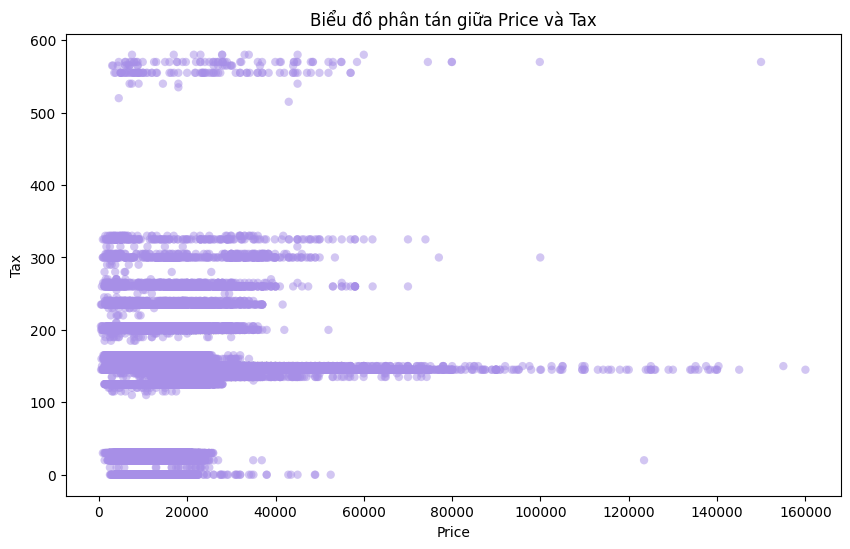

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['tax'], alpha=0.5,c='#A78FE7', edgecolors='none')  # alpha là độ mờ của điểm
plt.title('Biểu đồ phân tán giữa Price và Tax')
plt.xlabel('Price')
plt.ylabel('Tax')
plt.grid(False)
plt.show()

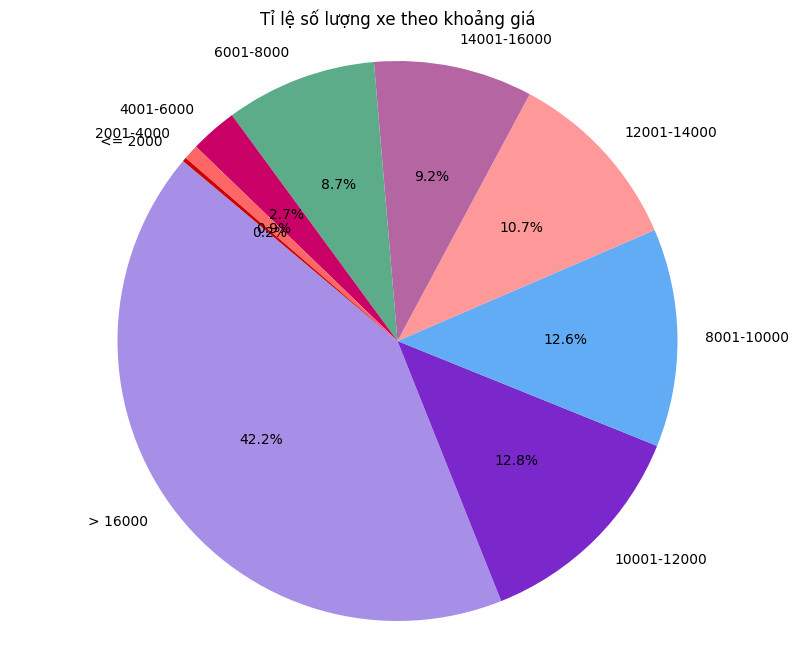

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Định nghĩa các khoảng giá (bins)
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, float('inf')]
labels = ['<= 2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000',
          '12001-14000', '14001-16000', '> 16000']

# Giả sử df đã được đọc từ file CSV và không có lỗi UnicodeDecodeError
# Tạo cột mới 'price_bin' để lưu khoảng giá tương ứng với từng mẫu xe
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Tính tỉ lệ số lượng mẫu theo từng khoảng giá
price_counts = df['price_bin'].value_counts()

# Định nghĩa danh sách màu sắc
colors = ['#A78FE7', '#7A28CC', '#62ABF5', '#FF9999', '#B565A2', '#5CAB89', '#C90066', '#FF6666', '#CC0000']

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tỉ lệ số lượng xe theo khoảng giá')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


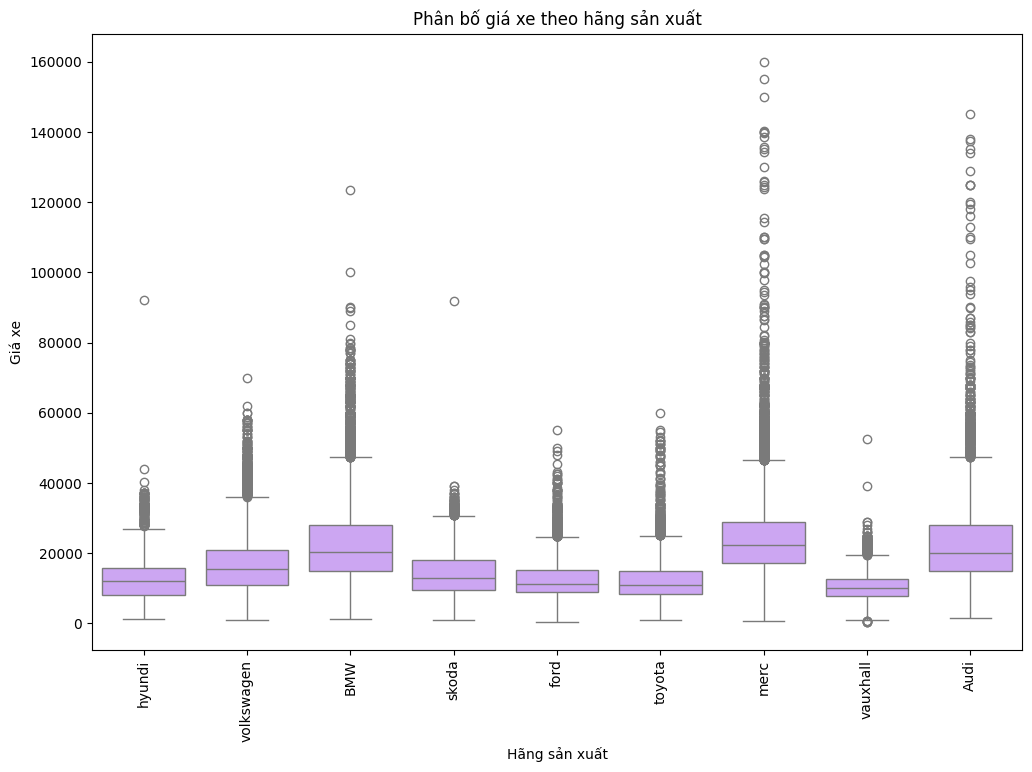

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Manufacturer', y='price', data=df, color = '#CC99FF')
plt.xticks(rotation=90)
plt.title('Phân bố giá xe theo hãng sản xuất')
plt.xlabel('Hãng sản xuất')
plt.ylabel('Giá xe')
plt.show()

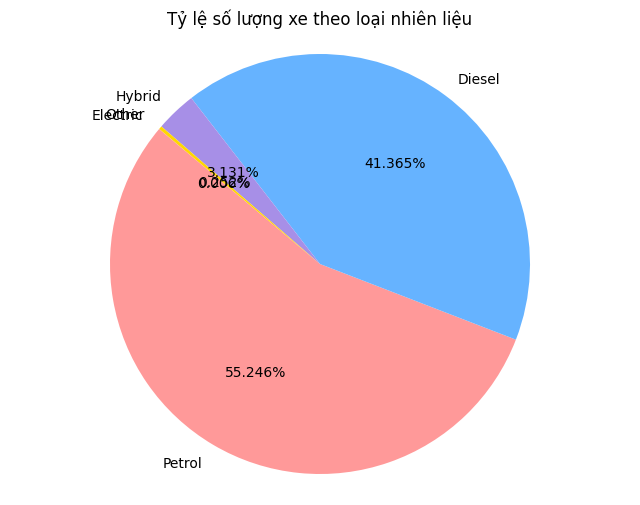

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fuel_counts = df['fuelType'].value_counts()
colors = ['#FF9999', '#66B3FF', '#A78FE7', '#FFD700']
plt.figure(figsize=(8, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.3f%%', startangle=140, colors=colors)
plt.title('Tỷ lệ số lượng xe theo loại nhiên liệu')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


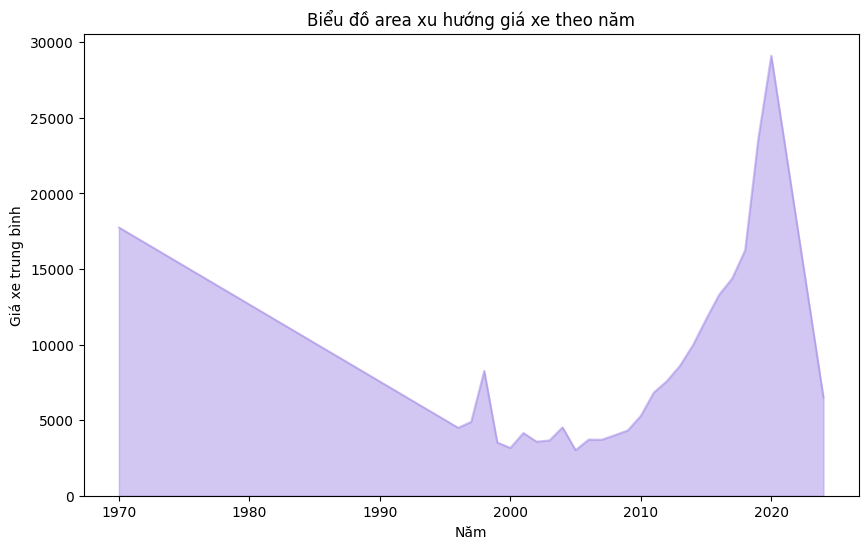

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.groupby('year')['price'].mean().plot(kind='area', stacked=False, color='#A78FE7')
plt.title('Biểu đồ area xu hướng giá xe theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá xe trung bình')
plt.grid(False)
plt.show()


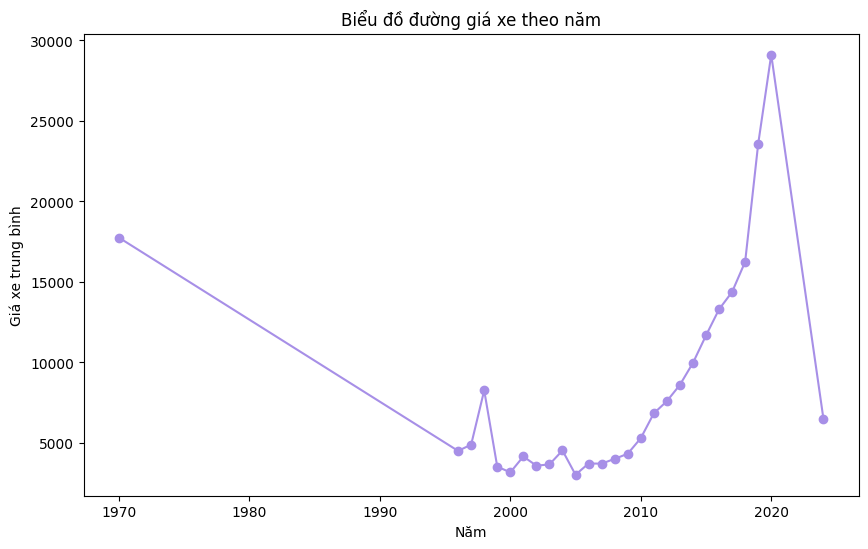

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('year')['price'].mean().plot(marker='o', color = '#A78FE7')
plt.title('Biểu đồ đường giá xe theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá xe trung bình')
plt.grid(False)
plt.show()

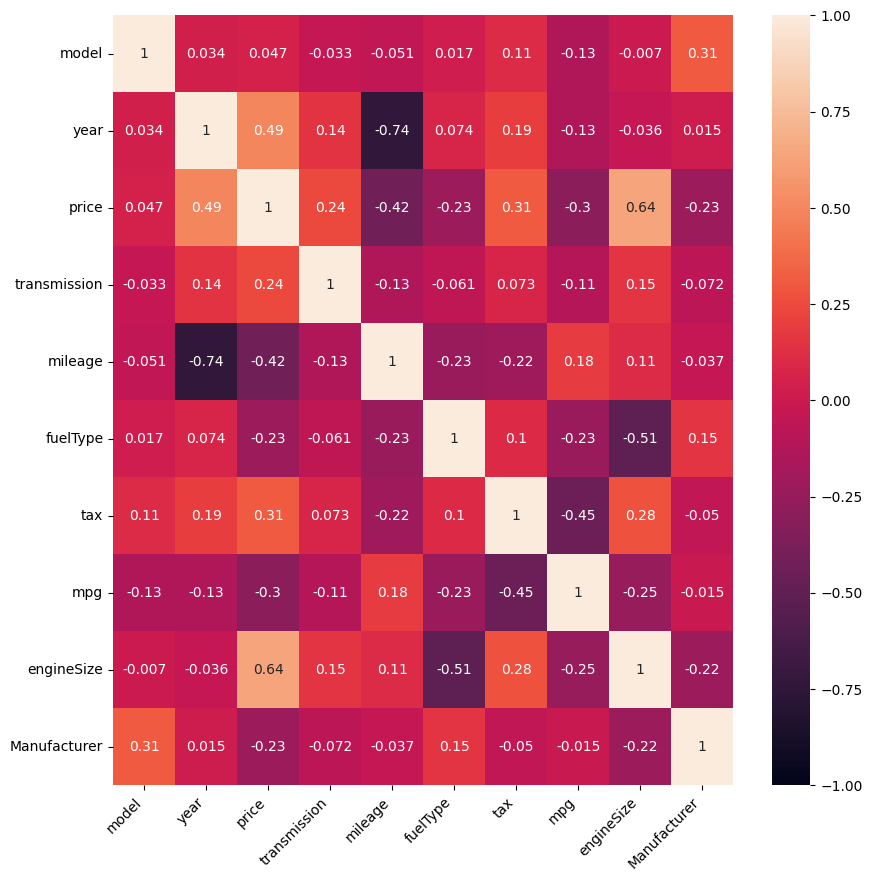

<class 'pandas.core.frame.DataFrame'>
Index: 92780 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         92780 non-null  int64  
 1   year          92780 non-null  int64  
 2   price         92780 non-null  float64
 3   transmission  92780 non-null  int64  
 4   mileage       92780 non-null  int64  
 5   fuelType      92780 non-null  int64  
 6   tax           92780 non-null  int64  
 7   mpg           92780 non-null  float64
 8   engineSize    92780 non-null  float64
 9   Manufacturer  92780 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 7.8 MB


<ipython-input-44-a87f8de5eeeb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['mileage_log'] = np.log1p(df3['mileage'])


In [ ]:
# Tiền xử lý dữ liệu
# Copy dữ liệu
df3 = df.copy()
categorical_features = ['model', 'transmission', 'fuelType', 'Manufacturer']

# Khởi tạo LabelEncoders
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df3[feature] = label_encoders[feature].fit_transform(df3[feature])

#Ma trận tương quan
correlation = df3.corr()
fig1 = plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Kiểm tra và xử lý giá trị ngoại lệ
z_scores = np.abs((df3 - df3.mean()) / df3.std())
outliers = (z_scores > 3).any(axis=1)
df3 = df3[~outliers]
df3.info()

# Biến đổi phân bố của các đặc trưng
df3['mileage_log'] = np.log1p(df3['mileage'])
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2 = df3[(df3 >= lower_bound) & (df3 <= upper_bound)].dropna()

In [ ]:
# Chọn các thuộc tính để huấn luyện mô hình
features = ['model', 'year', 'transmission', 'mileage', 'mpg', 'engineSize', 'Manufacturer', 'tax', 'fuelType']
X = df2[features]
y = df2['price']

In [ ]:
# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Khởi tạo và huấn luyện mô hình KNN.
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = knn.predict(X_test_scaled)

# In ra giá thật và giá dự đoán tương ứng cho tập kiểm tra
results = pd.DataFrame({'Giá thật': y_test, 'Giá dự đoán': y_pred})
print(f'Giá dự đoán cho tập test:\n{results.head(30)}')

Giá dự đoán cho tập test:
       Giá thật   Giá dự đoán
29488   25985.0  24545.285714
54876   13499.0  13268.714286
59553   10242.0  10909.857143
22103    8395.0   9665.000000
63931   15298.0  17676.285714
55467    6988.0   7442.571429
60037   20000.0  19728.000000
63148   12750.0  13338.285714
14466    8985.0  10176.000000
4111    11850.0  12930.285714
52828   21999.0  24324.285714
14223   12495.0  11606.000000
61036    7999.0   8233.714286
11283    8500.0   9097.428571
2779    10998.0  11052.142857
63342   10498.0  10444.571429
91364   19750.0  20116.571429
14436   11990.0  12022.428571
92488   20690.0  22546.714286
55161   12699.0  12523.142857
58448   17990.0  21260.714286
2977     7495.0   7848.142857
23546   15446.0  14726.285714
31313   16695.0  17216.714286
23254   17495.0  20053.000000
70164   10179.0  11128.571429
34737   17298.0  17407.285714
80912   14897.0  15079.428571
8687     7991.0   8374.857143
96453   19194.0  15151.285714


In [ ]:
# Đánh giá quá trình luyện hay chạy giải thuật, hiệu chỉnh siêu tham số.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared trên tập kiểm tra: {r2}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error trên tập kiểm tra: {mse}')

R-squared trên tập kiểm tra: 0.9090869089778073
Mean Squared Error trên tập kiểm tra: 1978425.0901912104


In [ ]:
# Dự đoán giá cho một xe mới

new_data = pd.DataFrame({
    'model': [' Fiesta', ' Fiesta', ' 3 Series'],
    'year': [2019, 2017, 2017],
    'transmission': ['Manual', 'Automatic', 'Manual'],
    'mileage': [19910, 24468, 10586],
    'fuelType': [ 'Petrol', 'Petrol', 'Diesel'],
    'tax': [145, 150, 50],
    'mpg': [ 61.4, 54.3, 50.4],
    'engineSize': [1.0, 2.0, 1.2],
    'Manufacturer': ['ford', 'ford', 'BMW']
})


for feature in categorical_features:
    new_data[feature] = label_encoders[feature].transform(new_data[feature])


# Biến đổi và chuẩn hóa dữ liệu mới
new_data['mileage_log'] = np.log1p(new_data['mileage'])


# Chọn và chuẩn hóa các thuộc tính mới
new_data_scaled = scaler.transform(new_data[features])

# Dự đoán giá của xe mới
predicted_price = knn.predict(new_data_scaled)
print(f'Giá dự đoán cho xe mới: {predicted_price}')


Giá dự đoán cho xe mới: [16938. 14562. 11477.]


In [ ]:
#Tìm kiếm k tốt nhất với GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# In ra giá trị k tốt nhất và độ chính xác tương ứng
print(f"Giá trị k tốt nhất: {grid_search.best_params_['n_neighbors']}")
# print(f"Giá trị MSE tốt nhất: {-grid_search.best_score_}")

# Sử dụng k tốt nhất để khởi tạo và huấn luyện mô hình KNN
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = knn.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error trên tập kiểm tra: {mse}')

# In ra giá thật và giá dự đoán tương ứng cho tập kiểm tra
results = pd.DataFrame({'Giá thật': y_test, 'Giá dự đoán': y_pred})
print(f'Giá dự đoán cho tập test:\n{results.head(30)}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared trên tập kiểm tra: {r2}')



Giá trị k tốt nhất: 5
Giá dự đoán cho tập test:
       Giá thật  Giá dự đoán
29488   25985.0      24360.6
54876   13499.0      13476.4
59553   10242.0      11097.0
22103    8395.0       9538.0
63931   15298.0      18548.8
55467    6988.0       7539.6
60037   20000.0      18720.2
63148   12750.0      12575.6
14466    8985.0      10687.6
4111    11850.0      12693.4
52828   21999.0      24257.0
14223   12495.0      11752.2
61036    7999.0       8177.4
11283    8500.0       9139.2
2779    10998.0      11258.0
63342   10498.0      10583.0
91364   19750.0      19865.2
14436   11990.0      12237.4
92488   20690.0      22485.8
55161   12699.0      13035.4
58448   17990.0      22372.8
2977     7495.0       8066.6
23546   15446.0      14949.2
31313   16695.0      17113.6
23254   17495.0      20396.2
70164   10179.0      11080.0
34737   17298.0      17512.6
80912   14897.0      15732.2
8687     7991.0       8184.8
96453   19194.0      14712.2
R-squared trên tập kiểm tra: 0.910138677016634


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo mô hình hồi quy cây quyết định
tree_model = DecisionTreeRegressor()

# Huấn luyện mô hình
tree_model.fit(X_train_scaled, y_train)

# Dự đoán giá xe
y_pred = tree_model.predict(X_test_scaled)

results = pd.DataFrame({'Giá thật': y_test, 'Giá dự đoán': y_pred})
print(f'Giá dự đoán cho tập test:\n{results.head(30)}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error trên tập kiểm tra: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared trên tập kiểm tra: {r2}')


Giá dự đoán cho tập test:
       Giá thật  Giá dự đoán
29488   25985.0      22765.0
54876   13499.0      14691.0
59553   10242.0      10695.0
22103    8395.0       9970.0
63931   15298.0      19565.0
55467    6988.0       6750.0
60037   20000.0      18917.0
63148   12750.0      13995.0
14466    8985.0      10485.0
4111    11850.0      11999.0
52828   21999.0      23995.0
14223   12495.0      11990.0
61036    7999.0       8100.0
11283    8500.0       9499.0
2779    10998.0      10998.0
63342   10498.0      11990.0
91364   19750.0      17250.0
14436   11990.0      11995.0
92488   20690.0      23490.0
55161   12699.0      12600.0
58448   17990.0      19252.0
2977     7495.0       6940.0
23546   15446.0      15370.0
31313   16695.0      16775.0
23254   17495.0      18999.0
70164   10179.0      10491.0
34737   17298.0      17490.0
80912   14897.0      15995.0
8687     7991.0       7995.0
96453   19194.0      16991.0
Mean Squared Error trên tập kiểm tra: 2558434.928777564
R-squared trên tập 